In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#import sklearn.preprocessing


In [18]:
house = pd.read_csv('./data/clean_house.csv',index_col=0)

In [19]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,month,grade_value,renovated,yr_since_renovate,total_rooms
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,98178,47.5112,-122.257,1340,5650,10,7,0.0,60.0,3.00
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,98125,47.7210,-122.319,1690,7639,12,7,1.0,24.0,6.75
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,...,98028,47.7379,-122.233,2720,8062,2,6,0.0,82.0,2.00
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,98136,47.5208,-122.393,1360,5000,12,7,0.0,50.0,12.00
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,98074,47.6168,-122.045,1800,7503,2,8,0.0,28.0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0.0,...,98103,47.6993,-122.346,1530,1509,5,8,0.0,6.0,7.50
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0.0,...,98146,47.5107,-122.362,1830,7200,2,8,0.0,1.0,10.00
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0.0,...,98144,47.5944,-122.299,1020,2007,6,7,0.0,6.0,1.50
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0.0,...,98027,47.5345,-122.069,1410,1287,1,8,0.0,11.0,7.50


In [20]:
house['adj_sqft_living'] = house.sqft_living / house.yr_since_renovate

In [21]:
house['total_rooms'] = house.bathrooms * house.bedrooms

In [22]:
#Get correlation table of all numeric values of the housing data
corr_mat = house.corr(method='pearson')

#Get top right part of correlation table
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

#Drop the non top right part and unstack the data
unique_corr = upper_corr_mat.unstack().dropna()

#Sort the values and get absolute values to account for negative correlation
sort_corr = unique_corr.abs().sort_values(ascending=False)

#Convert to data frame
new_corr = sort_corr.to_frame().reset_index()

#Make correlation data frame with just correlations that contain price
price_corr = new_corr[(new_corr.level_0 == 'price') | (new_corr.level_1 == 'price')]

#Rename columns
price_corr.columns = ['feature1','feature2','corr']

In [23]:
top_10 = price_corr[0:10]
top_10 = house[['price']+list(top_10.feature1)]

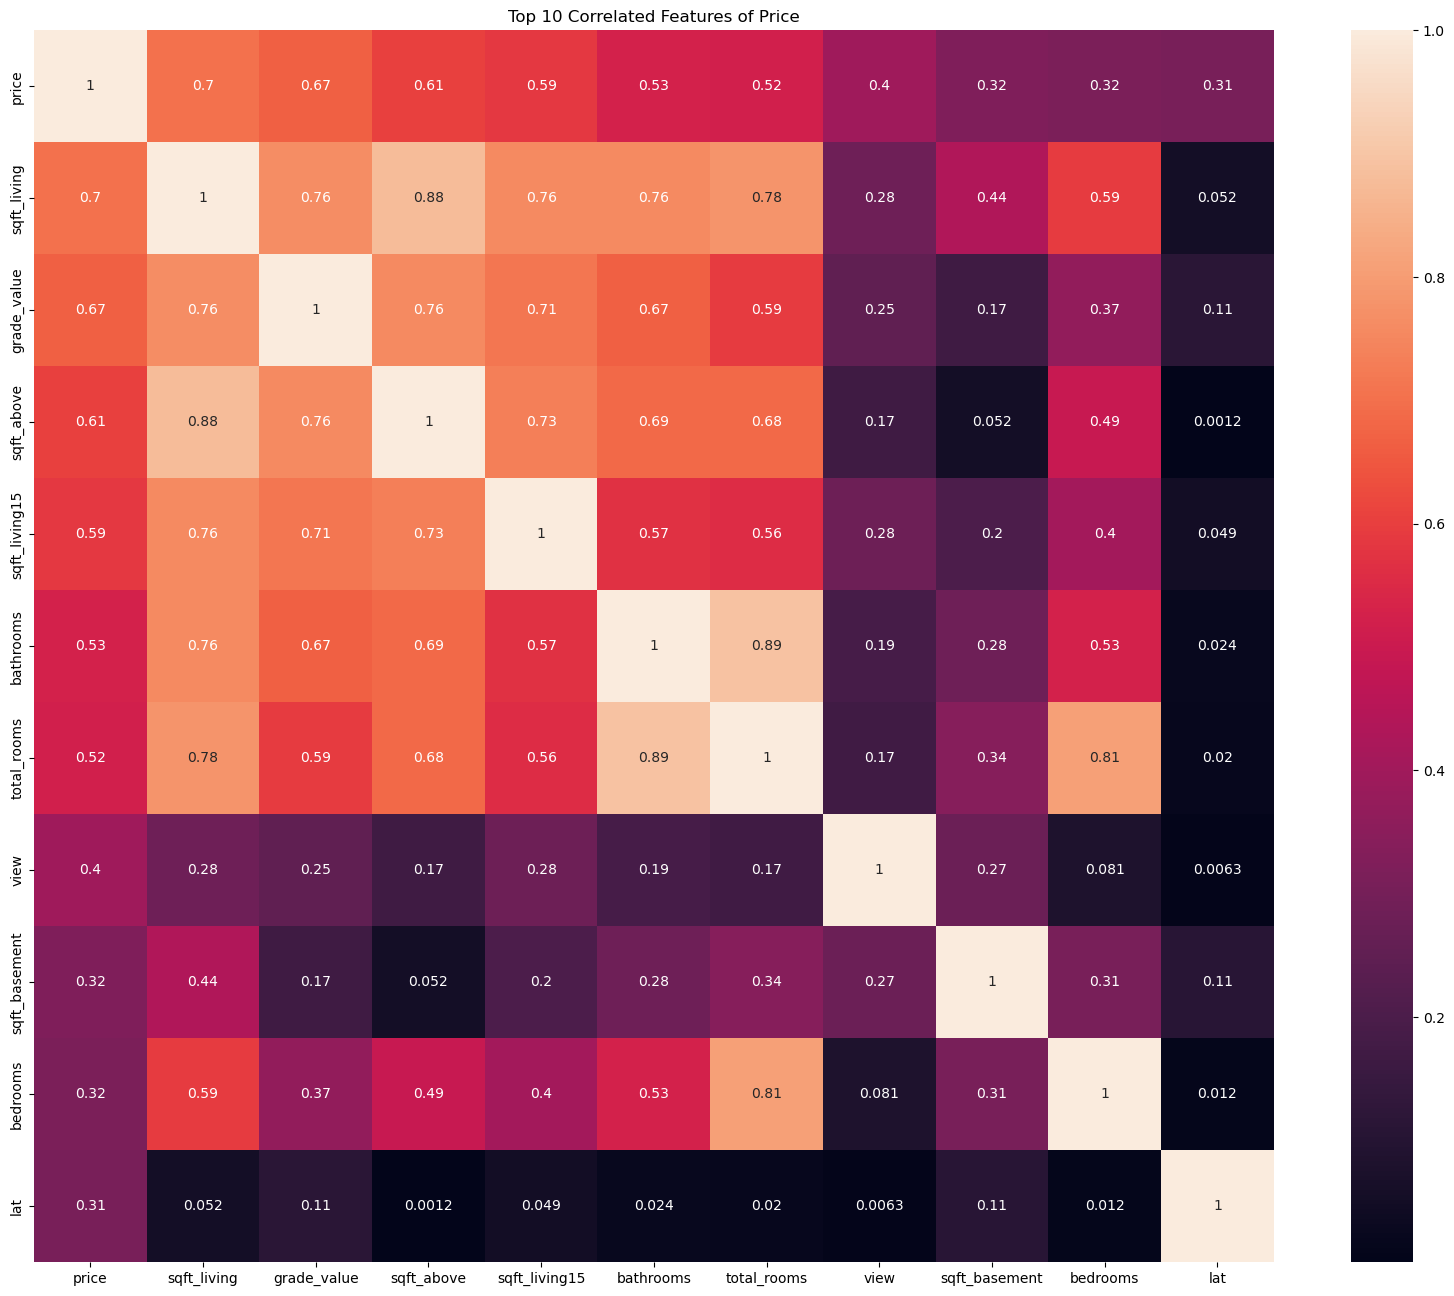

In [24]:
plt.figure(figsize=(20,16))
plt.title("Top 10 Correlated Features of Price")
sns.heatmap(top_10.corr().abs(),annot=True);

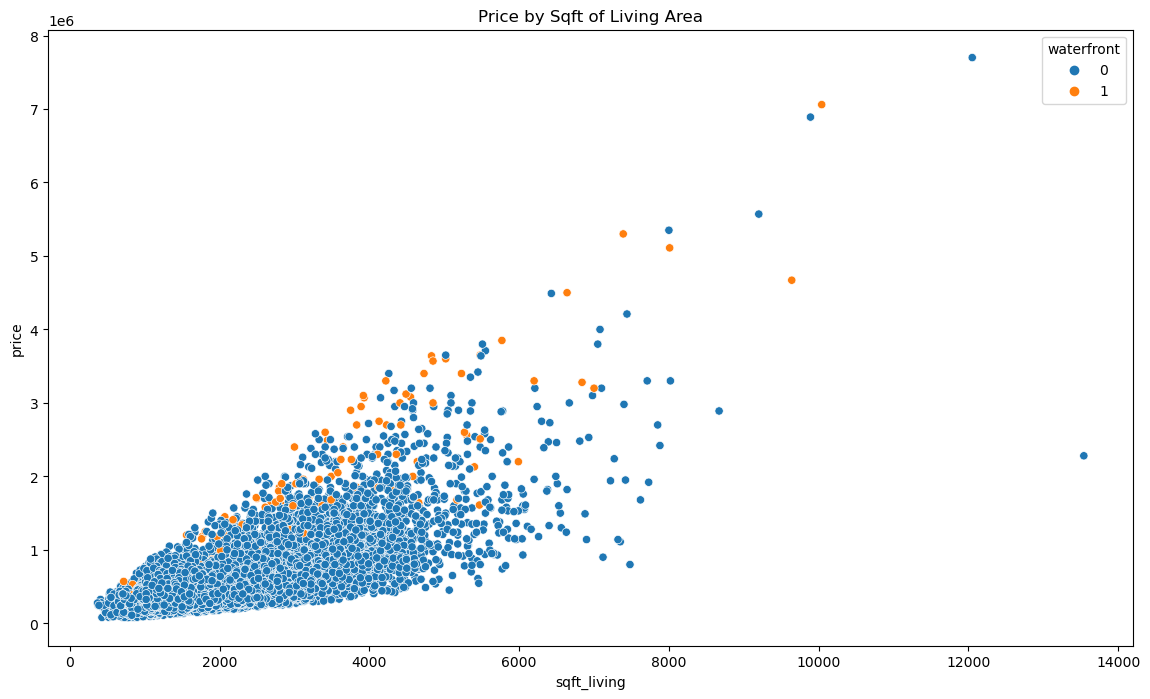

In [25]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=house.sqft_living,y=house.price,hue=house.waterfront)
plt.title("Price by Sqft of Living Area");

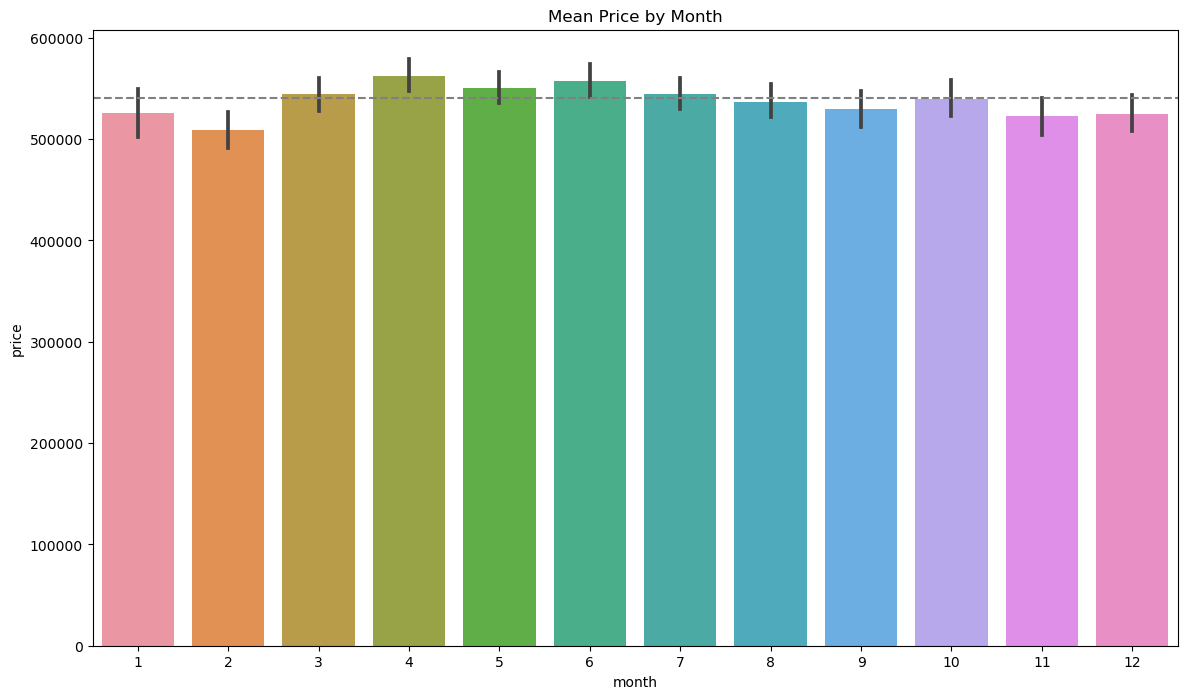

In [26]:
plt.figure(figsize=(14,8))
sns.barplot(x=house.month,y=house.price)
plt.axhline(house.price.mean(),linestyle ='--',color='gray')
plt.title('Mean Price by Month');

In [27]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21596 non-null  int64  
 1   date               21596 non-null  object 
 2   price              21596 non-null  float64
 3   bedrooms           21596 non-null  int64  
 4   bathrooms          21596 non-null  float64
 5   sqft_living        21596 non-null  int64  
 6   sqft_lot           21596 non-null  int64  
 7   floors             21596 non-null  float64
 8   waterfront         21596 non-null  int64  
 9   view               21596 non-null  float64
 10  condition          21596 non-null  int64  
 11  grade              21596 non-null  object 
 12  sqft_above         21596 non-null  int64  
 13  sqft_basement      21596 non-null  int64  
 14  yr_built           21596 non-null  int64  
 15  yr_renovated       21596 non-null  float64
 16  zipcode            215

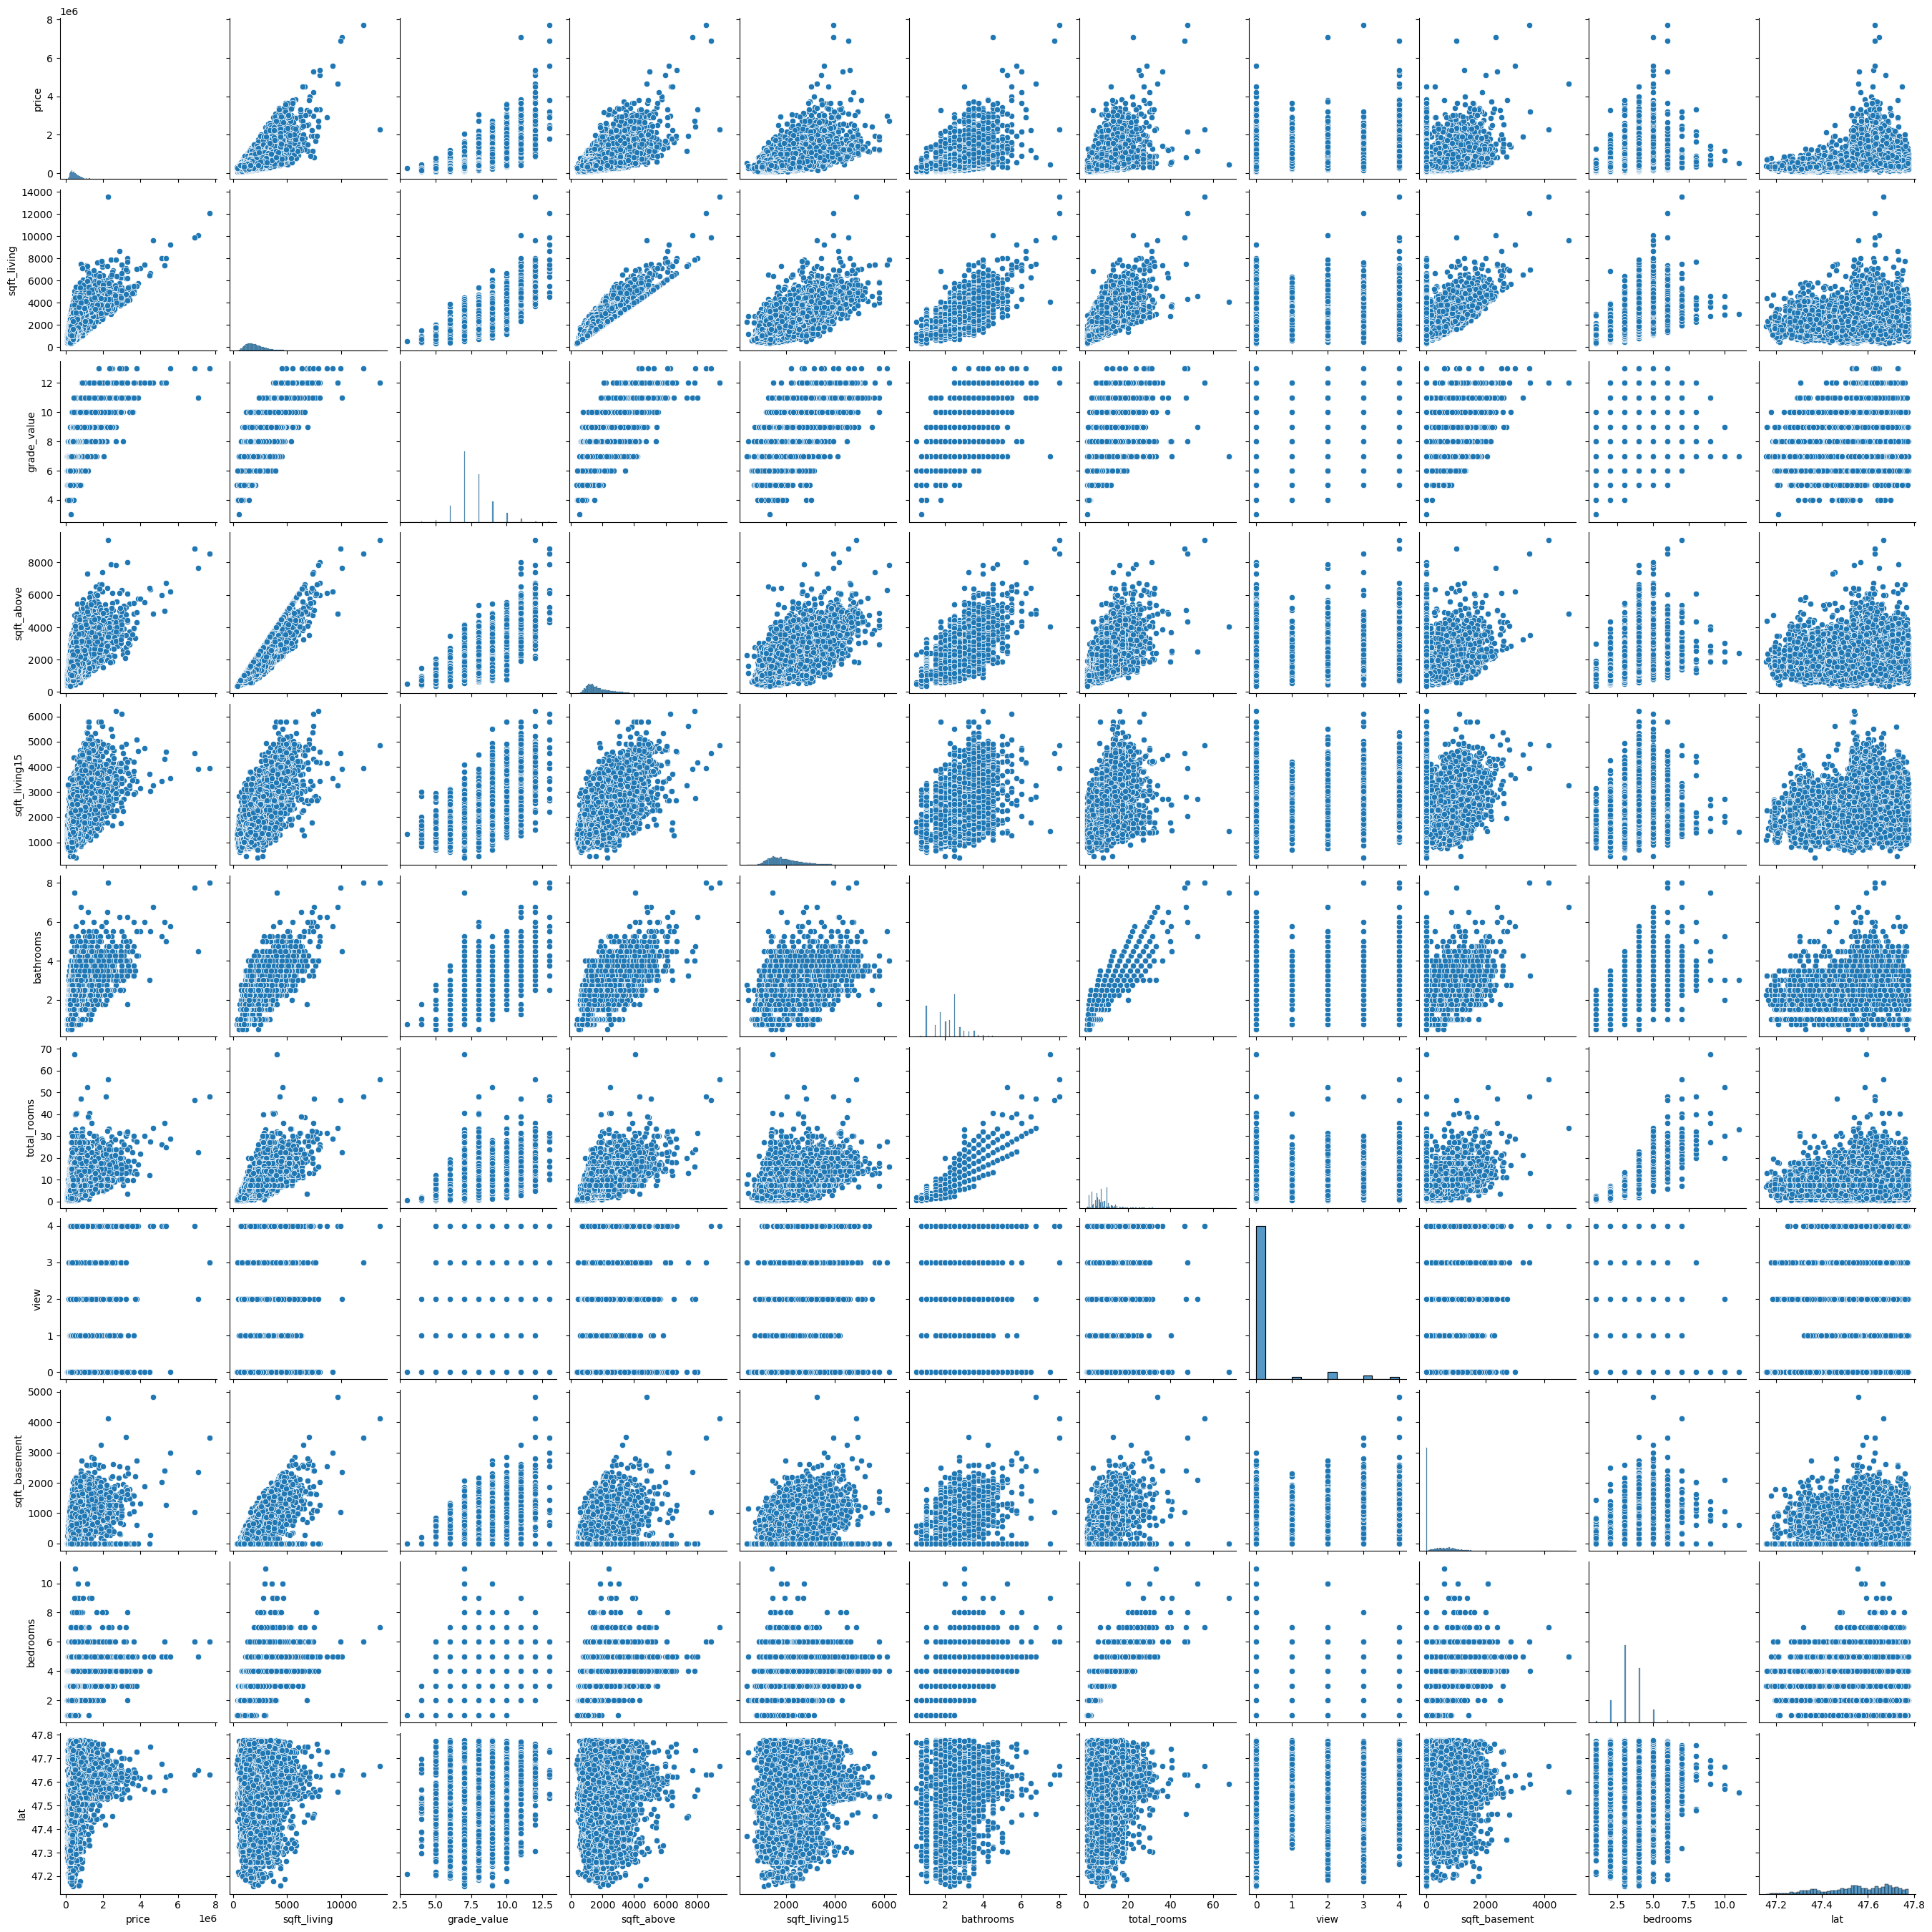

In [34]:
sns.pairplot(top_10);

<AxesSubplot:xlabel='adj_sqft_living', ylabel='price'>

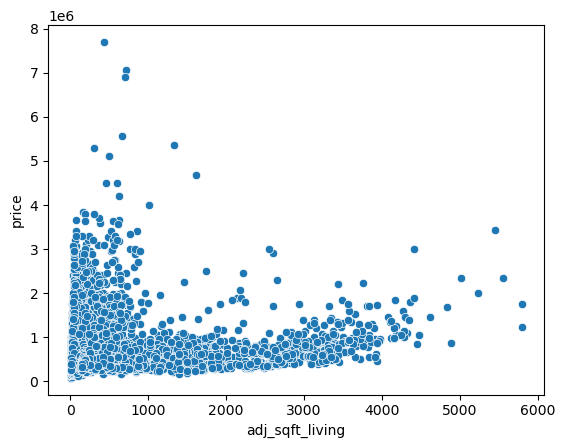

In [28]:
sns.scatterplot(x=house.adj_sqft_living,y=house.price)

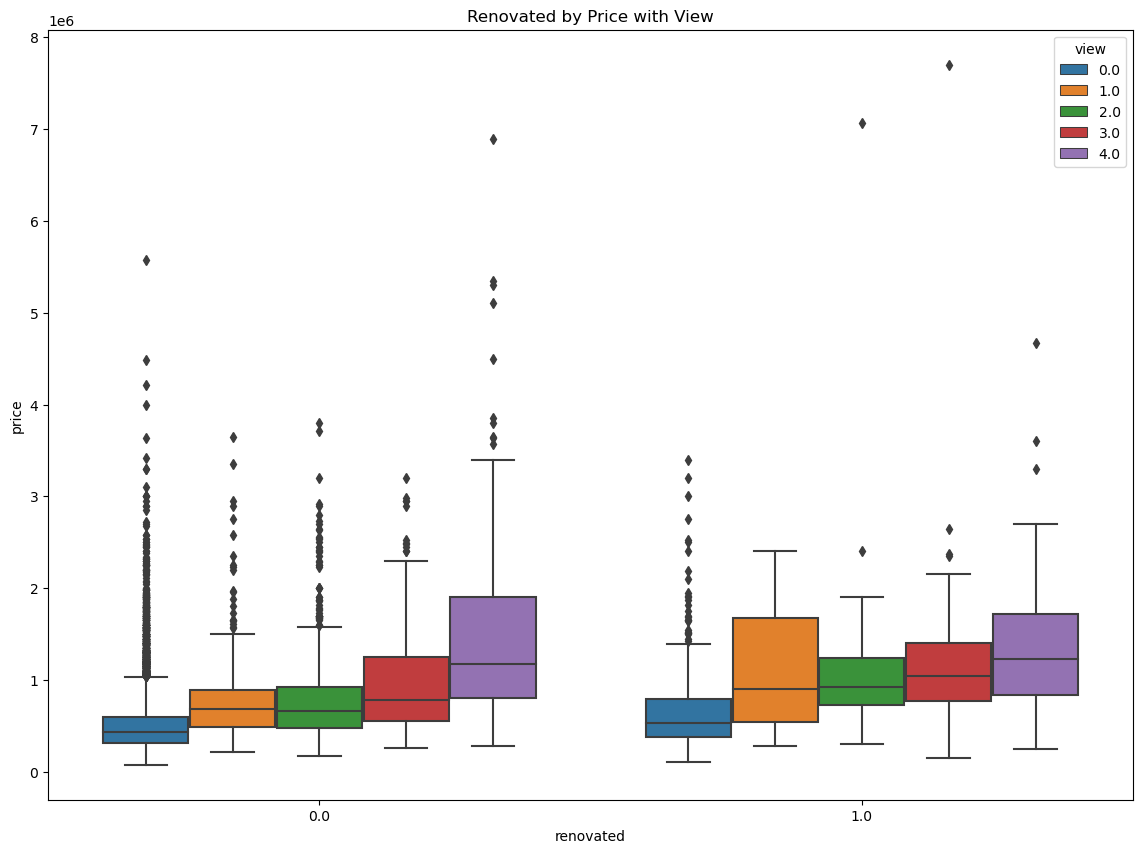

In [29]:
plt.figure(figsize=(14,10))
sns.boxplot(x=house.renovated,y=house.price,hue=house.view)
plt.title('Renovated by Price with View');

In [30]:
house.renovated.value_counts()

0.0    20852
1.0      744
Name: renovated, dtype: int64

In [31]:
house[house.renovated == 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,month,grade_value,renovated,yr_since_renovate,total_rooms,adj_sqft_living
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,47.7210,-122.319,1690,7639,12,7,1.0,24.0,6.75,107.083333
35,9547205180,2014-06-13,696000.0,3,2.50,2300,3060,1.5,0,0.0,...,47.6827,-122.310,1590,3264,6,8,1.0,13.0,7.50,176.923077
95,1483300570,2014-09-08,905000.0,4,2.50,3300,10250,1.0,0,0.0,...,47.5873,-122.249,1950,6045,9,7,1.0,24.0,10.00,137.500000
103,2450000295,2014-10-07,1090000.0,3,2.50,2920,8113,2.0,0,0.0,...,47.5814,-122.196,2370,8113,10,8,1.0,5.0,7.50,584.000000
125,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,0,0.0,...,47.6141,-122.212,3060,11275,3,8,1.0,23.0,11.00,119.565217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19602,6392000625,2014-07-12,451000.0,2,1.00,900,6000,1.0,0,0.0,...,47.6855,-122.289,1460,4800,7,7,1.0,11.0,2.00,81.818182
20041,126039256,2014-09-04,434900.0,3,2.00,1520,5040,2.0,0,0.0,...,47.7770,-122.362,1860,8710,9,7,1.0,9.0,6.00,168.888889
20428,4305600360,2015-02-25,500012.0,4,2.50,2400,9612,1.0,0,0.0,...,47.4799,-122.127,2430,5539,2,8,1.0,6.0,10.00,400.000000
20431,3319500628,2015-02-12,356999.0,3,1.50,1010,1546,2.0,0,0.0,...,47.5998,-122.311,1010,1517,2,8,1.0,1.0,4.50,1010.000000


In [32]:
house.groupby('zipcode').mean().sort_values('view')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,month,grade_value,renovated,yr_since_renovate,total_rooms,adj_sqft_living
zipcode,,,,,,,,,,,,,,,,,,,,,
98148,5.579459e+09,2.849086e+05,3.140351,1.793860,1610.526316,8960.719298,1.210526,0.000000,0.000000,3.070175,...,47.437437,-122.329316,1611.228070,8812.385965,6.578947,6.947368,0.017544,50.964912,5.907895,172.981056
98031,4.475569e+09,3.003404e+05,3.498168,2.155678,1929.692308,12106.772894,1.443223,0.000000,0.007326,3.501832,...,47.403765,-122.189304,1908.853480,8482.197802,6.487179,7.377289,0.003663,32.996337,7.706960,96.804311
98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,...,47.308780,-122.213357,1479.030151,7585.482412,6.698492,6.693467,0.025126,46.075377,6.525126,166.788080
98077,3.153599e+09,6.828860e+05,3.616162,2.465909,2857.045455,54829.000000,1.641414,0.000000,0.010101,3.348485,...,47.745922,-122.061202,2782.525253,45491.767677,6.651515,8.782828,0.015152,29.752525,9.185606,129.802158
98168,3.204785e+09,2.403284e+05,2.996283,1.433086,1468.624535,11269.843866,1.159851,0.000000,0.014870,3.245353,...,47.489700,-122.307877,1471.680297,9744.022305,6.550186,6.509294,0.022305,61.159851,4.606877,79.242361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98022,4.014550e+09,3.167424e+05,3.158798,1.918455,1837.313305,74233.914163,1.324034,0.000000,0.630901,3.733906,...,47.211226,-121.995549,1801.545064,51488.420601,6.832618,7.175966,0.055794,39.879828,6.307940,123.826206
98166,4.043990e+09,4.643224e+05,3.377953,1.911417,2067.905512,13609.397638,1.250000,0.055118,0.665354,3.574803,...,47.455212,-122.350303,1886.850394,12694.322835,6.291339,7.393701,0.086614,53.267717,6.738189,123.524543
98040,4.199323e+09,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.039007,0.780142,3.787234,...,47.559846,-122.225592,2898.744681,12801.283688,6.453901,8.960993,0.102837,39.560284,11.362589,NaN
